This notebook captures climax movements. Bear dominating a day, but next day bulls ctake charge with large counter move.

In [2]:
import numpy as np
import pandas as pd

import datetime
from pandas.tseries.frequencies import to_offset

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt

In [3]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,9,25)
nifty_data = load_nifty_data(start_date,end_date)

In [4]:
daily_returns = (nifty_data['Close']/nifty_data['Close'].shift(1) - 1)*100
daily_returns = daily_returns.dropna()

In [5]:
first_day_gain = 2
second_day_gain = 1.5

In [6]:
two_day_return_history_data = pd.concat([daily_returns.rename('Current Day'),daily_returns.shift(1).rename('Previous Day')], axis=1)
two_day_return_history_data = two_day_return_history_data.dropna()

In [9]:
strong_couple_data = two_day_return_history_data[(two_day_return_history_data['Current Day'] >= second_day_gain) &
                                            (two_day_return_history_data['Previous Day'] >= first_day_gain)].copy()
strong_couple_data = strong_couple_data[['Previous Day','Current Day']]

In [11]:
pct_change_after_strong_couple = []
for ix, row in strong_couple_data.iterrows():
    pct_change_by_day = []
    for i in range(1,5):
        after_ix = daily_returns.index.get_loc(ix) + i
        ret = daily_returns[after_ix]
        pct_change_by_day.append(ret)
    
    pct_change_after_strong_couple.append(pct_change_by_day)

In [14]:
strong_couple_study_data = pd.DataFrame(pct_change_after_strong_couple, columns=['1st','2nd','3rd','4th'],
                                                                   index = strong_couple_data.index)
strong_couple_study_data = pd.concat([strong_couple_data, strong_couple_study_data], axis=1)
strong_couple_study_data

,Previous Day,Current Day,1st,2nd,3rd,4th
Date,,,,,,
2006-04-18,2.380810,2.713750,0.504534,1.064808,-0.012593,-0.675893
2006-06-16,6.305074,3.271045,0.918574,-1.906133,2.172090,2.438899
2006-06-22,2.172090,2.438899,1.601135,0.249778,-3.511130,1.333582
2006-06-23,2.438899,1.601135,0.249778,-3.511130,1.333582,-0.045265
2007-01-12,2.388126,2.795358,0.640353,0.051491,-0.099253,0.799715
2007-04-16,2.284685,2.450636,-0.707638,0.668766,-0.347742,2.148762
2007-10-10,4.761952,2.143695,1.532680,-1.748464,4.460922,-0.041443
2007-10-11,2.143695,1.532680,-1.748464,4.460922,-0.041443,-1.918649
2007-10-29,2.394527,3.570489,-0.629032,0.543557,-0.579597,1.124189


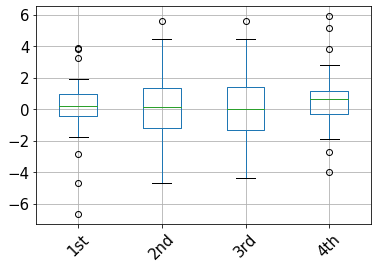

In [19]:
strong_couple_study_data[['1st','2nd','3rd','4th']].boxplot(grid=True, rot=45, fontsize=15)

In [20]:
strong_couple_study_data[['1st','2nd','3rd','4th']].describe()

,1st,2nd,3rd,4th
count,44.000000,44.000000,44.000000,44.000000
mean,0.159798,0.028466,0.078849,0.583647
std,1.824330,2.251820,2.276643,1.821482
min,-6.657667,-4.683174,-4.378049,-4.000465
25%,-0.405320,-1.197420,-1.350928,-0.284551
50%,0.216879,0.125430,-0.006630,0.622358
75%,0.982377,1.361599,1.389327,1.141061
max,3.890428,5.582416,5.582416,5.894719


In [23]:
strong_couple_study_data[(strong_couple_study_data['Previous Day'] > strong_couple_study_data['Current Day']) &
                     (strong_couple_study_data['Previous Day'] < 3.0)]

,Previous Day,Current Day,1st,2nd,3rd,4th
Date,,,,,,
2006-06-23,2.438899,1.601135,0.249778,-3.511130,1.333582,-0.045265
2007-10-11,2.143695,1.532680,-1.748464,4.460922,-0.041443,-1.918649
2007-12-03,2.274341,1.774326,-0.113384,1.393737,0.247475,0.329152
2008-12-16,2.048710,2.031061,-2.873346,3.601469,0.547251,-1.241267
2008-12-30,2.273165,1.960851,-0.683001,2.510856,0.438445,2.451793
2009-04-24,2.804552,1.666326,-0.308841,-3.102305,3.319107,5.182861
2009-06-01,2.578912,1.819530,-0.102651,0.120435,0.925905,0.311635
2009-06-10,2.732567,2.291829,-0.376994,-1.170839,-2.168696,0.753791
2010-05-27,2.301971,1.742791,1.268214,0.389812,-2.282602,0.998954


In [24]:
strong_couple_study_data[(strong_couple_study_data['Previous Day'] > strong_couple_study_data['Current Day']) &
                     (strong_couple_study_data['Previous Day'] < 3.0)].describe()

,Previous Day,Current Day,1st,2nd,3rd,4th
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.481235,1.792790,0.194550,0.598674,0.024176,0.623211
std,0.290349,0.251279,1.505853,2.207219,1.445982,1.616792
min,2.048710,1.513628,-2.873346,-3.511130,-2.282602,-1.918649
25%,2.273753,1.582355,-0.342918,-0.161257,-0.739360,-0.023487
50%,2.438899,1.742791,-0.102651,0.278119,0.202567,0.311635
75%,2.695646,1.916893,0.952170,2.030314,0.736578,1.035629
max,2.987305,2.291829,3.808711,4.460922,3.319107,5.182861
